# Red Wine Quality Prediction Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.shape

(1599, 12)

In [6]:
#checking the type of data present in each of the columns present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see there are no null values present in our given dataset

In [8]:
# let's check the unique values in quality
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
data.quality.mean()

5.6360225140712945

The dataset only contains values 5, 6, 7, 4, 8, 3 in the quality column of the dataset, this means the quality of every smaple of alcohol considered lies in this range. The average quality of all the alcohol samples is 5.63.

In [11]:
data.alcohol.mean()

10.422983114446502

The average level of alcohol is 10.432

Alcohol Quality Analysis 

Alcohol Quality = 3

In [12]:
data['quality3'] = (data['quality'] > 2) & (data['quality'] < 4)
data.groupby('quality3').size()

quality3
False    1589
True       10
dtype: int64

Alcohol Quality = 4

In [13]:
data['quality4'] = (data['quality'] > 3) & (data['quality'] < 5)
data.groupby('quality4').size()

quality4
False    1546
True       53
dtype: int64

Alcohol Quality = 5

In [14]:
data['quality5'] = (data['quality'] > 4) & (data['quality'] < 6)
data.groupby('quality5').size()

quality5
False    918
True     681
dtype: int64

Alcohol Quality = 6

In [15]:
data['quality6'] = (data['quality'] > 5) & (data['quality'] < 7)
data.groupby('quality6').size()

quality6
False    961
True     638
dtype: int64

Alcohol Quality = 7

In [16]:
data['quality7'] = (data['quality'] > 6) & (data['quality'] < 8)
data.groupby('quality7').size()

quality7
False    1400
True      199
dtype: int64

Alcohol Quality = 8

In [17]:
data['quality8'] = (data['quality'] > 7) & (data['quality'] < 9)
data.groupby('quality8').size()

quality8
False    1581
True       18
dtype: int64

From the above results we can say that:
    Samples with quality->3 : 10 / 1599
    Samples with quality->4 : 53 / 1599
    Samples with quality->5 : 681 / 1599
    Samples with quality->6 : 638 / 1599
    Samples with quality->7 : 199 / 1599
    Samples with quality->8 : 18 / 1599

In [18]:
#dropping columns we created for EDA
columns_to_drop = ['quality3','quality4','quality5','quality6','quality7','quality8']
data = data.drop(columns_to_drop, axis = 1)

In [19]:
#looking at the descriptive statistics 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1 - the mean and std of each coloumn are good.

2 - we also seem to have some extreme values in free sulphur dioxide as well as total sulfer dioxide.

3 - There are high chances of presence of outliers in residual sugar, chlorides, free sulphur dioxide,total sulphur dioxide, moving to visualizing the data.

Data Visualization 

<AxesSubplot:xlabel='quality', ylabel='count'>

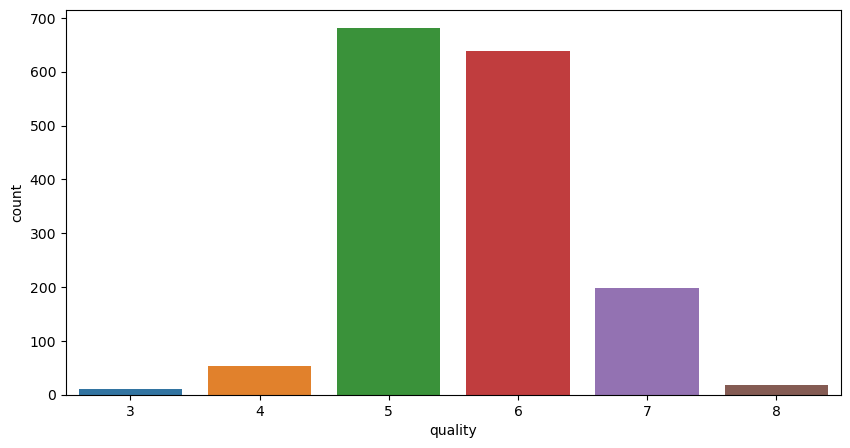

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=data,x='quality')

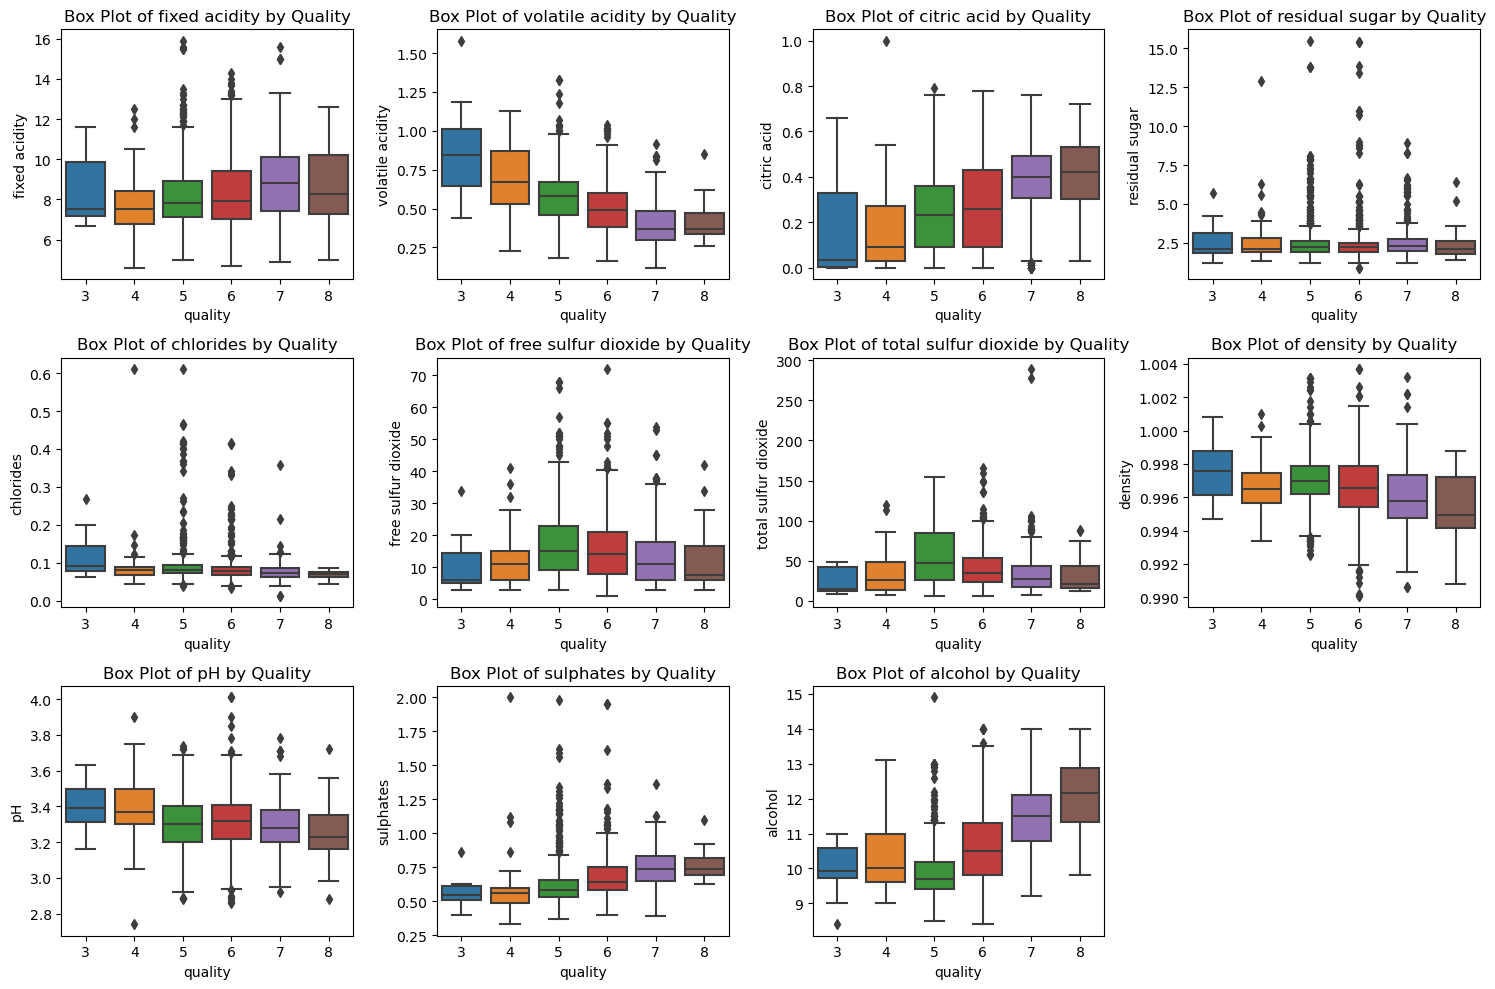

In [21]:
#creating a figure with subplots
plt.figure(figsize=(15, 10))

#loop through each independent variable in the DataFrame
for i, column in enumerate(data.columns[:-1]):  #exclude dependent variable
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=data['quality'], y=data[column])
    plt.title(f'Box Plot of {column} by Quality')

plt.tight_layout() 
plt.show()

1 - There are some outliers so we may have to perform some standardization 
2 - We can see the median value of alcohol increasing along with the quality of the wine increases  
3 - The same things happening with sulphate and citric acid. 
4 - The median value of the variable reduces with an increase in the quality of wine for variables like volatile acidity, density, and pH

<AxesSubplot:>

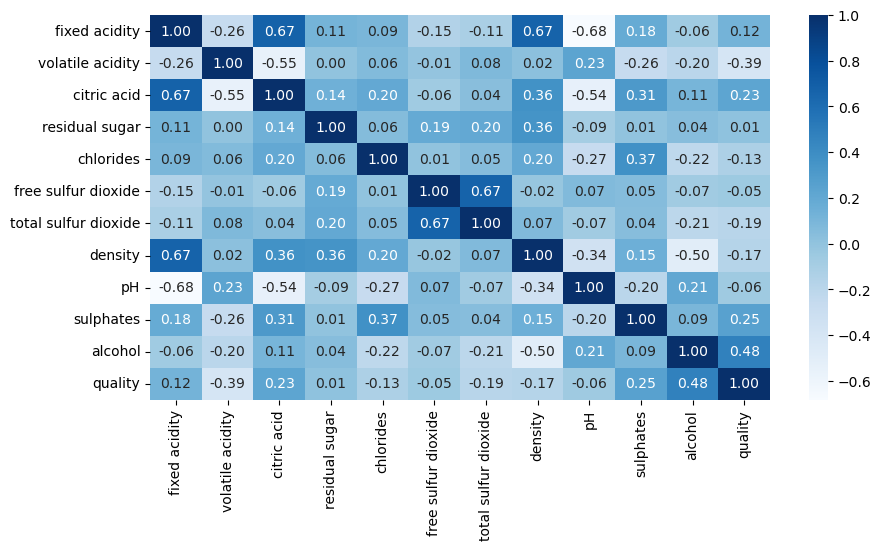

In [22]:
#checking correlation with headtmap
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot=True,cmap='Blues', fmt = '.2f')

1 - More the content of Citric acid higher is the fixed acidity
2 - Total sulphur dioxide is highly correlated with free sulphur dioxide
3 - Lesser the value in pH scale more the acidity, pH scale ranges from 0-14 7 is neutral and 0-7 level shows how acidic the solution is
4 - Higher the density of the wine more acidic the wine is, there is high negative correlation between the density and the acidity of the wine
5 - More the content of the alcohol, lower the density is, there is high negative correlation between the density and the alcohol of content of the wine
6 - There is some positive correlation between the sulphate and chloride content of the wine
7 - More the citric acid the higher is the acidity and that makes the density high

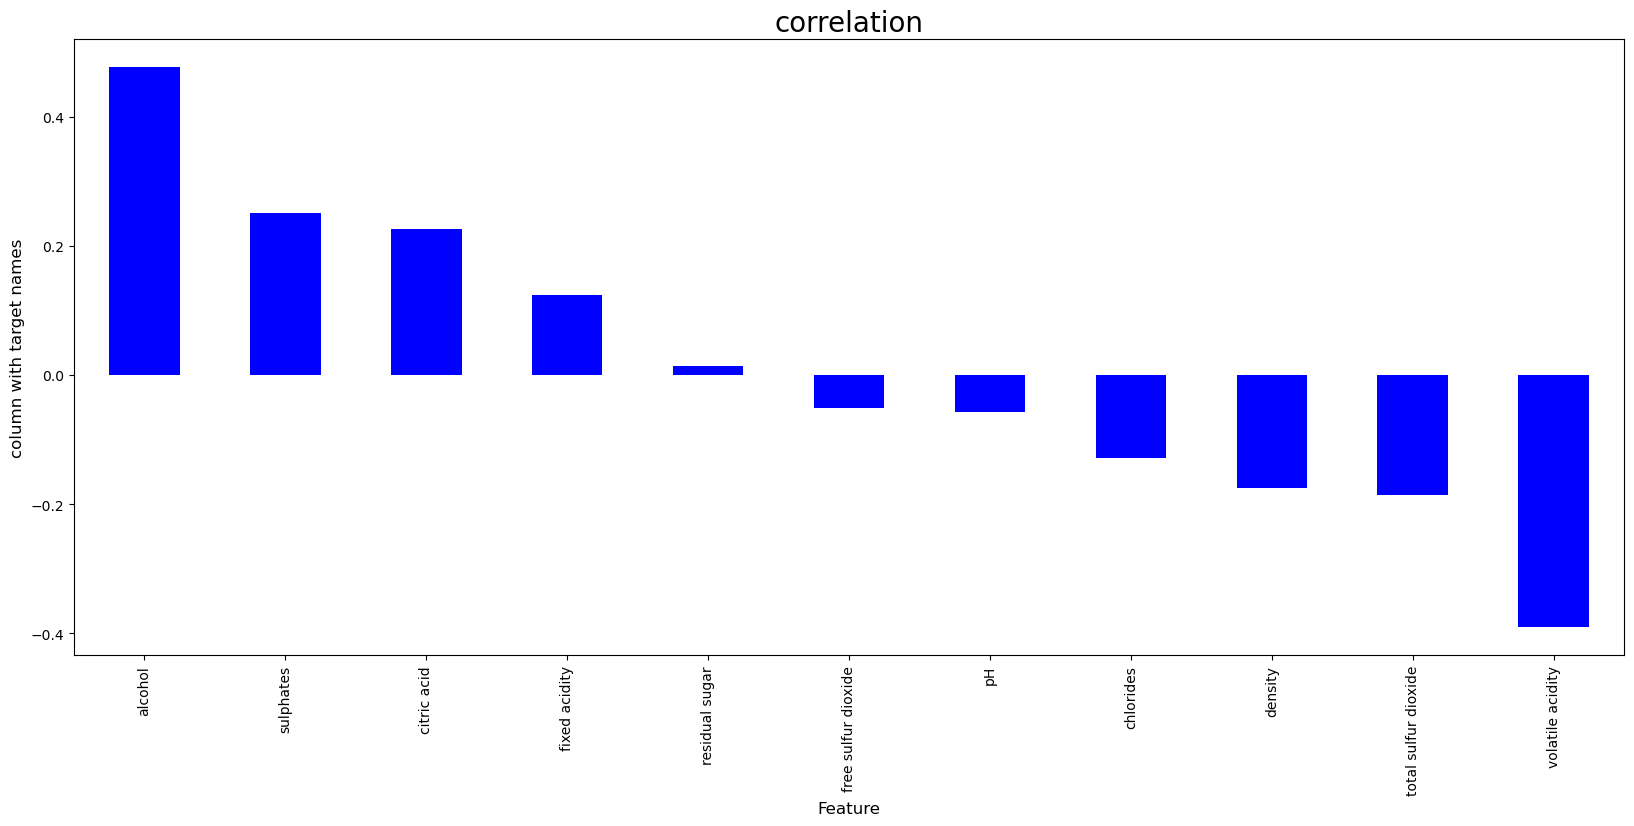

In [23]:
#Checking columns which are positively and negatively correlated with the target columns
plt.figure(figsize=(20,8))
data.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('column with target names',fontsize=12)
plt.title('correlation',fontsize=20)
plt.show()

we can observe that the residual sugar practically having very less relationship with the target variable but we will not remove it because we dont have enough data, otherwise our model will not perform with less data.

In [24]:
#feature selection
data['goodquality'] = [1 if x>=7 else 0 for x in data['quality']]

quality > 7 is "good"
quality < 7 is "not good"

In [25]:
X = data.drop(['quality', 'goodquality'], axis = 1)
y = data['goodquality'] 

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

0    1382
1     217
Name: goodquality, dtype: int64

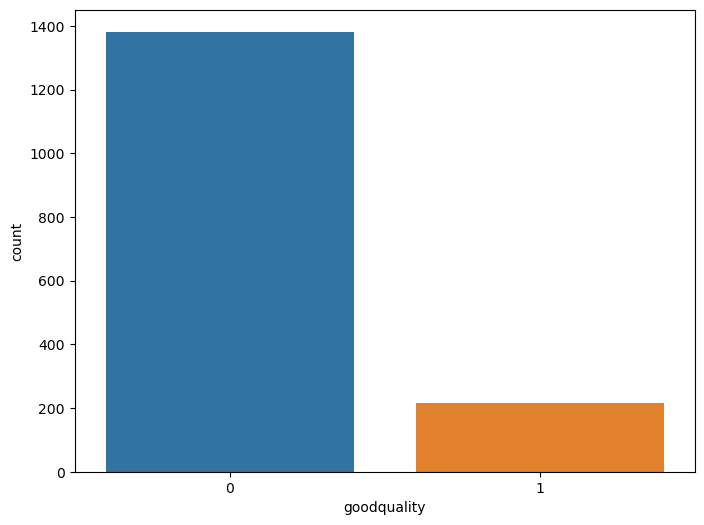

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x=y)

# Number of good and not good wines
data.goodquality.value_counts()

We can see that the dataset is unbalanced from the above visualization, so what we can do is to Over Sample the minority class using SMOTE.

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

<AxesSubplot:xlabel='goodquality', ylabel='count'>

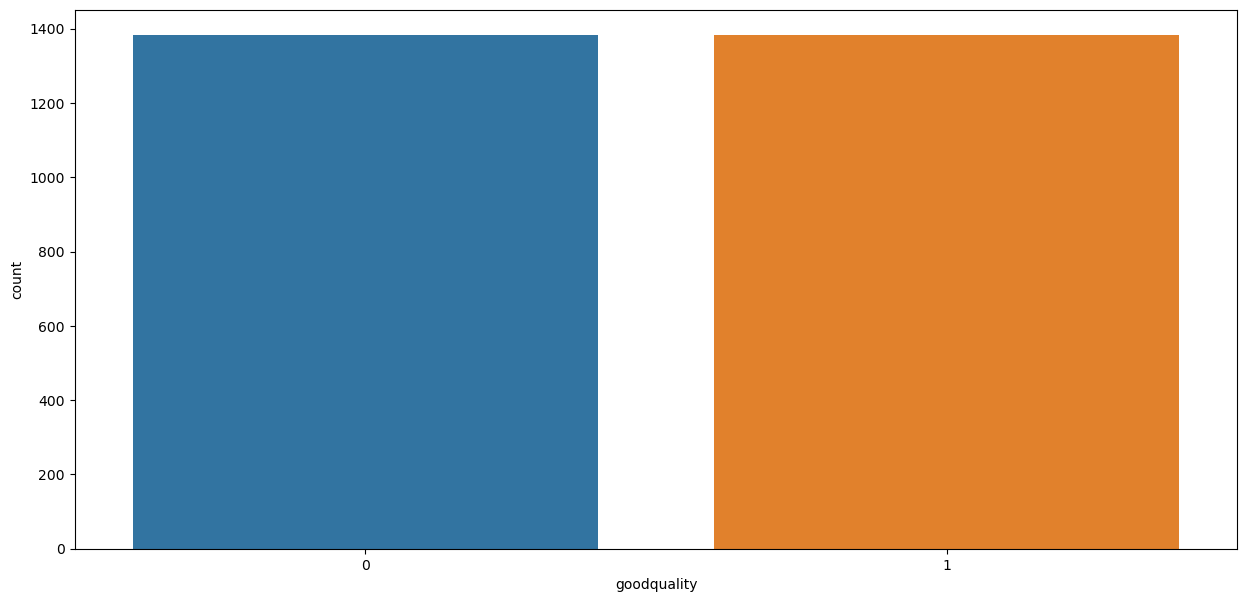

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_smote)

Now our dataset is balanced

In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_smote)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier as xgb


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [43]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

Classification Models - 

# Decision Tree

In [83]:
model = DecisionTreeClassifier(random_state=100) 
model.fit(X_train, y_train) #training thhe model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cv = cross_val_score(model, X_train, y_train, cv=5) 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       362
           1       0.87      0.92      0.89       329

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691

Accuracy Score: 0.8972503617945007
cross_val_score: 0.88


In [84]:
cfm = confusion_matrix(y_test, y_pred)

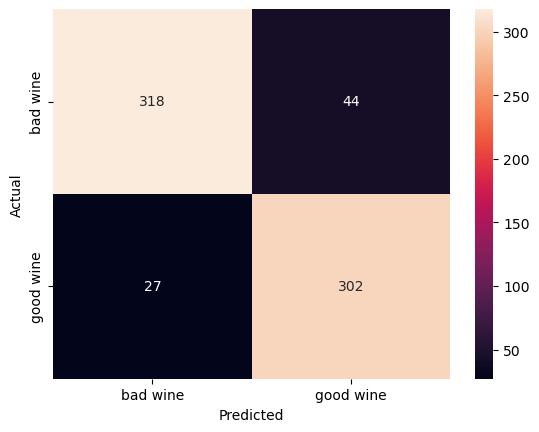

In [85]:
labels=['bad wine', 'good wine']

sns.heatmap(cfm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

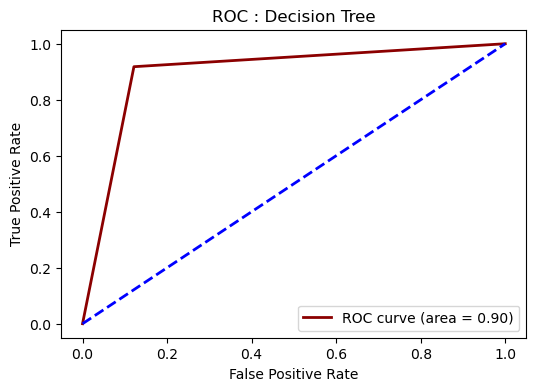

AUC Value: 0.90


In [86]:
# Evaluating the Decision Tree model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

#calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

# LogisticRegression

In [87]:
model = LogisticRegression(random_state=100)
model.fit(X_train, y_train) #training the model
y_pred = model.predict(X_test) #prediction
print(classification_report(y_test, y_pred)) #results
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cv = cross_val_score(model, X_train, y_train, cv=5) #cross validation 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       362
           1       0.79      0.86      0.83       329

    accuracy                           0.83       691
   macro avg       0.83      0.83      0.83       691
weighted avg       0.83      0.83      0.83       691

Accuracy Score: 0.8263386396526773
cross_val_score: 0.81


In [88]:
cfm = confusion_matrix(y_test, y_pred)

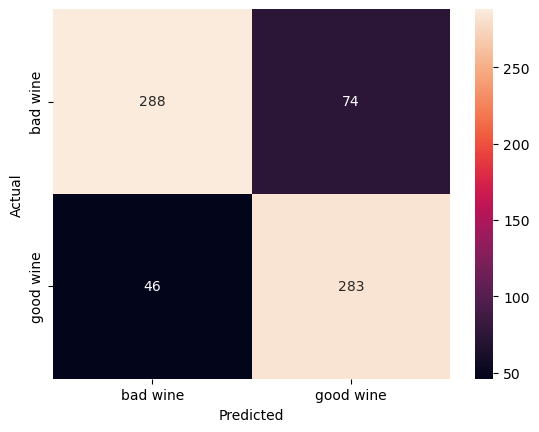

In [89]:
labels=['bad wine', 'good wine']

sns.heatmap(cfm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

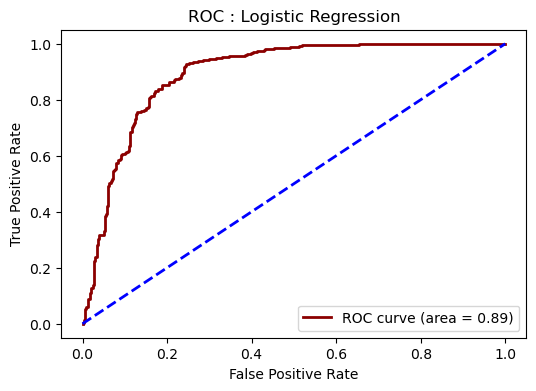

AUC Value: 0.89


In [90]:
# Evaluating the Decision Tree model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

#calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

# Random Forest

In [91]:
model = RandomForestClassifier(random_state = 100) 
model.fit(X_train, y_train) #training the model
y_pred = model.predict(X_test) #prediction
print(classification_report(y_test, y_pred)) #results
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cv = cross_val_score(model, X_train, y_train, cv=10)  #cross validation 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93       362
           1       0.89      0.98      0.93       329

    accuracy                           0.93       691
   macro avg       0.94      0.94      0.93       691
weighted avg       0.94      0.93      0.93       691

Accuracy Score: 0.9334298118668596
cross_val_score: 0.93


In [92]:
cfm = confusion_matrix(y_test, y_pred)

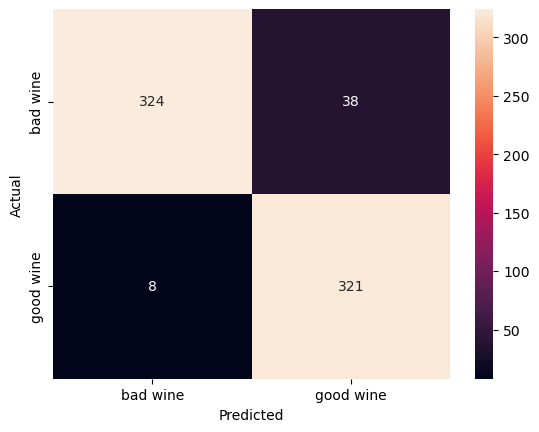

In [93]:
labels=['bad wine', 'good wine']

sns.heatmap(cfm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


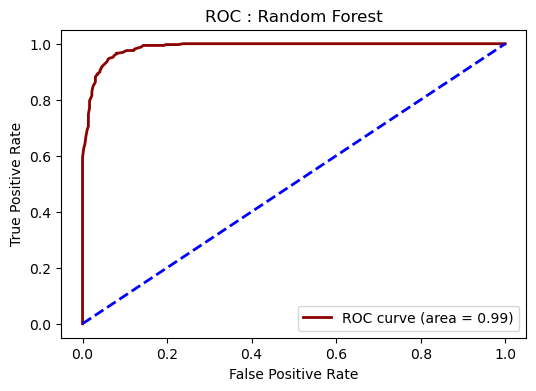

AUC Value: 0.99


In [94]:
# Evaluating the Decision Tree model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

#calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

# K-Nearest Neighbors

In [96]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) 
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cv = cross_val_score(model, X_train, y_train, cv=10)
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       362
           1       0.80      0.97      0.88       329

    accuracy                           0.87       691
   macro avg       0.88      0.87      0.87       691
weighted avg       0.89      0.87      0.87       691

Accuracy Score: 0.869753979739508
cross_val_score: 0.88


In [97]:
cfm = confusion_matrix(y_test, y_pred)

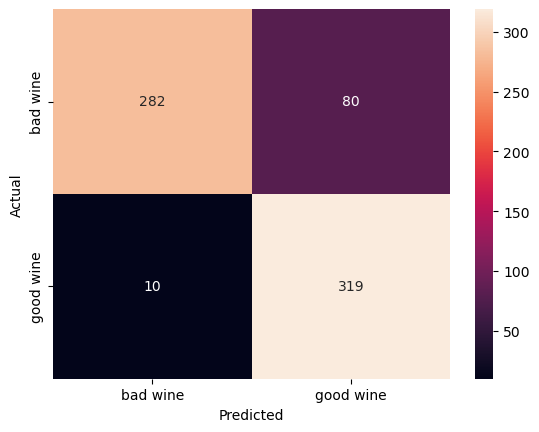

In [98]:
labels=['bad wine', 'good wine']

sns.heatmap(cfm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

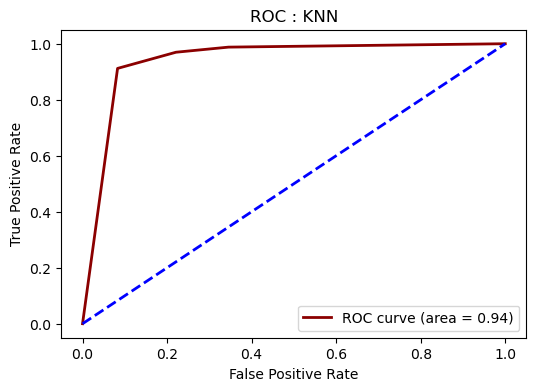

AUC Value: 0.94


In [100]:
# Evaluating the Decision Tree model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

#calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : KNN')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

# Xgboost

In [106]:
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) 
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cv = cross_val_score(model, X_train, y_train, cv=10)
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       362
           1       0.90      0.98      0.94       329

    accuracy                           0.94       691
   macro avg       0.94      0.94      0.94       691
weighted avg       0.94      0.94      0.94       691

Accuracy Score: 0.9392185238784371
cross_val_score: 0.94


In [107]:
cfm = confusion_matrix(y_test, y_pred)

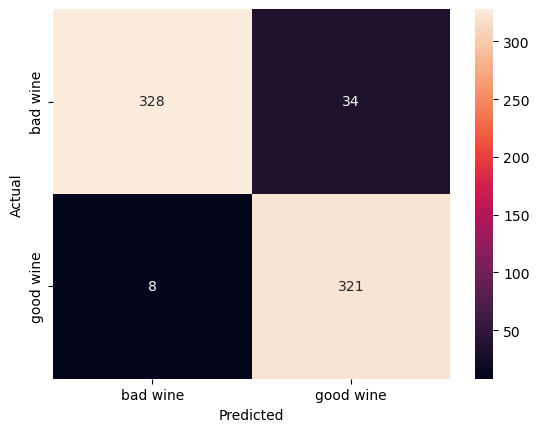

In [108]:
labels=['bad wine', 'good wine']

sns.heatmap(cfm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

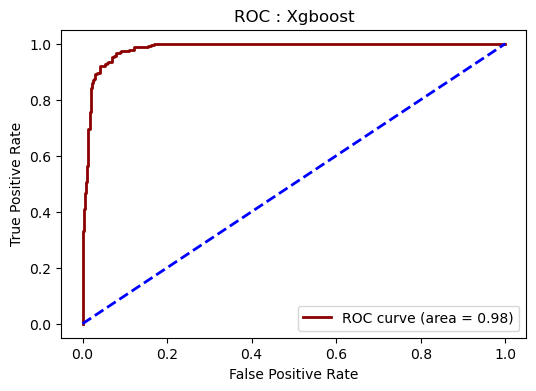

AUC Value: 0.98


In [118]:
# Evaluating the Decision Tree model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

#calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Xgboost')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

In [119]:
results = pd.DataFrame({
    'Model': ['Decision Tree' ,'Logistic Regression','Random Forest','K N Neighbors','Xgboost'],
    'Accuracy Score': [0.89,0.82,0.93,0.86,0.93]})

result_data = results.sort_values(by='Accuracy Score', ascending=False)
result_data = result_data.set_index('Accuracy Score')
result_data

,Model
Accuracy Score,
0.93,Random Forest
0.93,Xgboost
0.89,Decision Tree
0.86,K N Neighbors
0.82,Logistic Regression


After sorting the dataframe, we've found that Both Random Forest and Xgboost are the best-performing model, with the AUC metric being almost the same for both models. However, I've decided to go with Random Forest because the accuracy is higher and the Recall and Precision metrics also appear to be better.

In [131]:
from sklearn.model_selection import GridSearchCV
#Defining a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

#Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best Accuracy: 0.9290821256038647


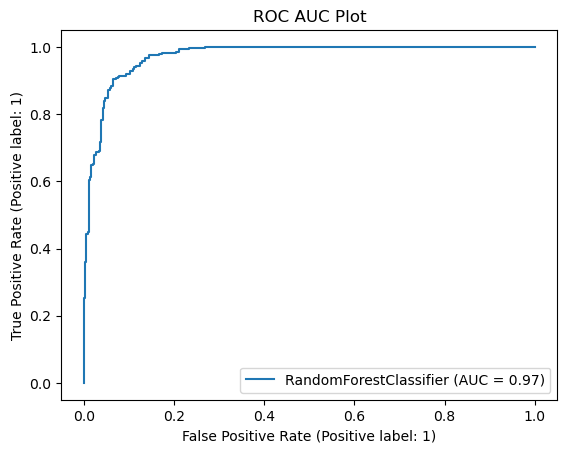

In [132]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [135]:
import pickle
filename = 'Red_Wine.pkl'
pickle.dump(GCV,open(filename,'wb'))